# Importing libaries

In [21]:
import glob
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from functools import reduce
from PIL import Image

# Importing functions to be used in this notebook

In [22]:
def convert_to_mins(string):
    
    a=string.split(' ')
    
    if len(a)==4:
        duration_in_min = int(a[0])*60 + int(a[2])
        
    elif (len(a)==2) and (a[1]=='m'):
        duration_in_min = int(a[0])
        
    elif (len(a)==2) and (a[1]=='h'):
        duration_in_min = int(a[0])*60
        
    elif (len(a)==1) and (a[0]=='Multi-day') :
        duration_in_min = 1500
        
    else:
        duration_in_min = None
        
    return duration_in_min

In [23]:
def convert_to_miles(string):
    a=string.split(' ')
    if (len(a)==2) and (a[1]=='mi'):
        distance = float(a[0])
    else:
        distance = None
    return distance

In [24]:
def number_of_tags(lst):
    
    return len(lst.split(','))

In [25]:
def number_of_words(string):
    return (len(string))

In [26]:
def difficulty(string):
    if string =='easy':
        return 1
    elif string == 'moderate':
        return 2
    elif string=='hard':
        return 3
    else:
        print('hah')

In [27]:
def is_there(string):
    if NaN:
        return 0
    else:
        return 1

In [28]:
def code_generator(name):
    return us_state_abbrev[name.replace('-', ' ').title()]

In [29]:
def gen_tag_list(string):
    return eval(string)

In [30]:
us_state_abbrev = {
'Alabama': 'AL',
'Alaska': 'AK',
'American Samoa': 'AS',
'Arizona': 'AZ',
'Arkansas': 'AR',
'California': 'CA',
'Colorado': 'CO',
'Connecticut': 'CT',
'Delaware': 'DE',
'District of Columbia': 'DC',
'Florida': 'FL',
'Georgia': 'GA',
'Guam': 'GU',
'Hawaii': 'HI',
'Idaho': 'ID',
'Illinois': 'IL',
'Indiana': 'IN',
'Iowa': 'IA',
'Kansas': 'KS',
'Kentucky': 'KY',
'Louisiana': 'LA',
'Maine': 'ME',
'Maryland': 'MD',
'Massachusetts': 'MA',
'Michigan': 'MI',
'Minnesota': 'MN',
'Mississippi': 'MS',
'Missouri': 'MO',
'Montana': 'MT',
'Nebraska': 'NE',
'Nevada': 'NV',
'New Hampshire': 'NH',
'New Jersey': 'NJ',
'New Mexico': 'NM',
'New York': 'NY',
'North Carolina': 'NC',
'North Dakota': 'ND',
'Northern Mariana Islands':'MP',
'Ohio': 'OH',
'Oklahoma': 'OK',
'Oregon': 'OR',
'Pennsylvania': 'PA',
'Puerto Rico': 'PR',
'Rhode Island': 'RI',
'South Carolina': 'SC',
'South Dakota': 'SD',
'Tennessee': 'TN',
'Texas': 'TX',
'Utah': 'UT',
'Vermont': 'VT',
'Virgin Islands': 'VI',
'Virginia': 'VA',
'Washington': 'WA',
'West Virginia': 'WV',
'Wisconsin': 'WI',
'Wyoming': 'WY'
}

# Merging two csv files fore each state

In [31]:
path1 ='/Users/eunheelim/Capstone1/data/*.csv'
path2 = '/Users/eunheelim/Capstone1/data2/*.csv'

filelist1=sorted(glob.iglob(path1))
filelist2=sorted(glob.iglob(path2))

df = pd.DataFrame() 

for file in filelist1:
    state = file[32:-4]
    file2 =  '/Users/eunheelim/Capstone1/data2/' + state + '2.csv'
    
    df1 = pd.read_csv(file,
                  header=None,
                  names=['distance', 'duration'])

    df2 = df2 = pd.read_csv(file2,
                 index_col='Unnamed: 0')
    
    df0= df2.join(df1)
    df0['state'] = state
    
    df= df.append(df0)

# Data engineering on the data frame

In [32]:
df['difficulty_rating'] = df['difficulty'].apply(difficulty)
df['short'] = df['short_description'].apply(number_of_words)
df['long'] = np.where(df['long_description'].isna(), 0, 1)
df['n_tags'] = df['tag_list'].apply(number_of_tags)

df['distance_mi']= df['distance'].apply(convert_to_miles)
df['duration_min']= df['duration'].apply(convert_to_mins)
df["State"] = df['state'].apply(code_generator)

df= df.drop(columns={'distance', 'duration','best_rating','worst_rating','difficulty'})

# Changing column names
df= df.rename(columns={"average_rating": "stars", "difficulty_rating":"difficulty", "distance_mi":'distance',"duration_min":"duration"})

df = df[df['duration']<1500]
df = df[df['review_count']!=0]

In [33]:
df.head()

,name,stars,review_count,location,elevation,route_type,short_description,long_description,tag_list,n_photos,n_recordings,n_completed,state,difficulty,short,long,n_tags,distance,duration,State
0,Walls of Jericho Trail,4.5,881,"Scottsboro, Alabama",1699.0,Out & Back,Walls of Jericho Trail is a 9 mile heavily tra...,NaN,"['Dog friendly', 'Camping', 'Hiking', 'Horseba...",1443,574,1584,alabama,3,296,0,17,9.0,277.0,AL
1,Cave Creek Trail from Cheaha Trailhead,4.5,466,Cheaha State Park,1105.0,Loop,Cave Creek Trail from Cheaha Trailhead is a 6....,Offline map recommended. Users have reported t...,"['Dogs on leash', 'Backpacking', 'Camping', 'H...",1035,449,857,alabama,2,325,1,10,6.7,207.0,AL
2,Sougahoagdee Falls,4.5,357,William B Bankhead National Forest,436.0,Out & Back,Sougahoagdee Falls is a 4 mile heavily traffic...,NaN,"['Dogs on leash', 'Kid friendly', 'Hiking', 'N...",382,243,480,alabama,1,279,0,10,4.0,102.0,AL
3,Cane Creek Canyon Nature Preserve,5.0,230,Cane Creek Canyon Nature Preserve,974.0,Loop,Cane Creek Canyon Nature Preserve is a 8.2 mil...,Privately owned scenic natural area open to th...,"['Dog friendly', 'Camping', 'Hiking', 'Nature ...",552,158,365,alabama,2,291,1,14,8.2,238.0,AL
4,Chinnabee Silent Trail,4.5,298,Cheaha Wilderness,892.0,Out & Back,Chinnabee Silent Trail is a 7.3 mile heavily t...,Note: Users have reported that the trailhead f...,"['Dogs on leash', 'Backpacking', 'Camping', 'F...",449,234,668,alabama,2,307,1,19,7.3,212.0,AL


array([[<AxesSubplot:title={'center':'stars'}>,
        <AxesSubplot:title={'center':'review_count'}>,
        <AxesSubplot:title={'center':'elevation'}>],
       [<AxesSubplot:title={'center':'n_photos'}>,
        <AxesSubplot:title={'center':'n_recordings'}>,
        <AxesSubplot:title={'center':'n_completed'}>],
       [<AxesSubplot:title={'center':'difficulty'}>,
        <AxesSubplot:title={'center':'short'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'n_tags'}>,
        <AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'duration'}>]], dtype=object)

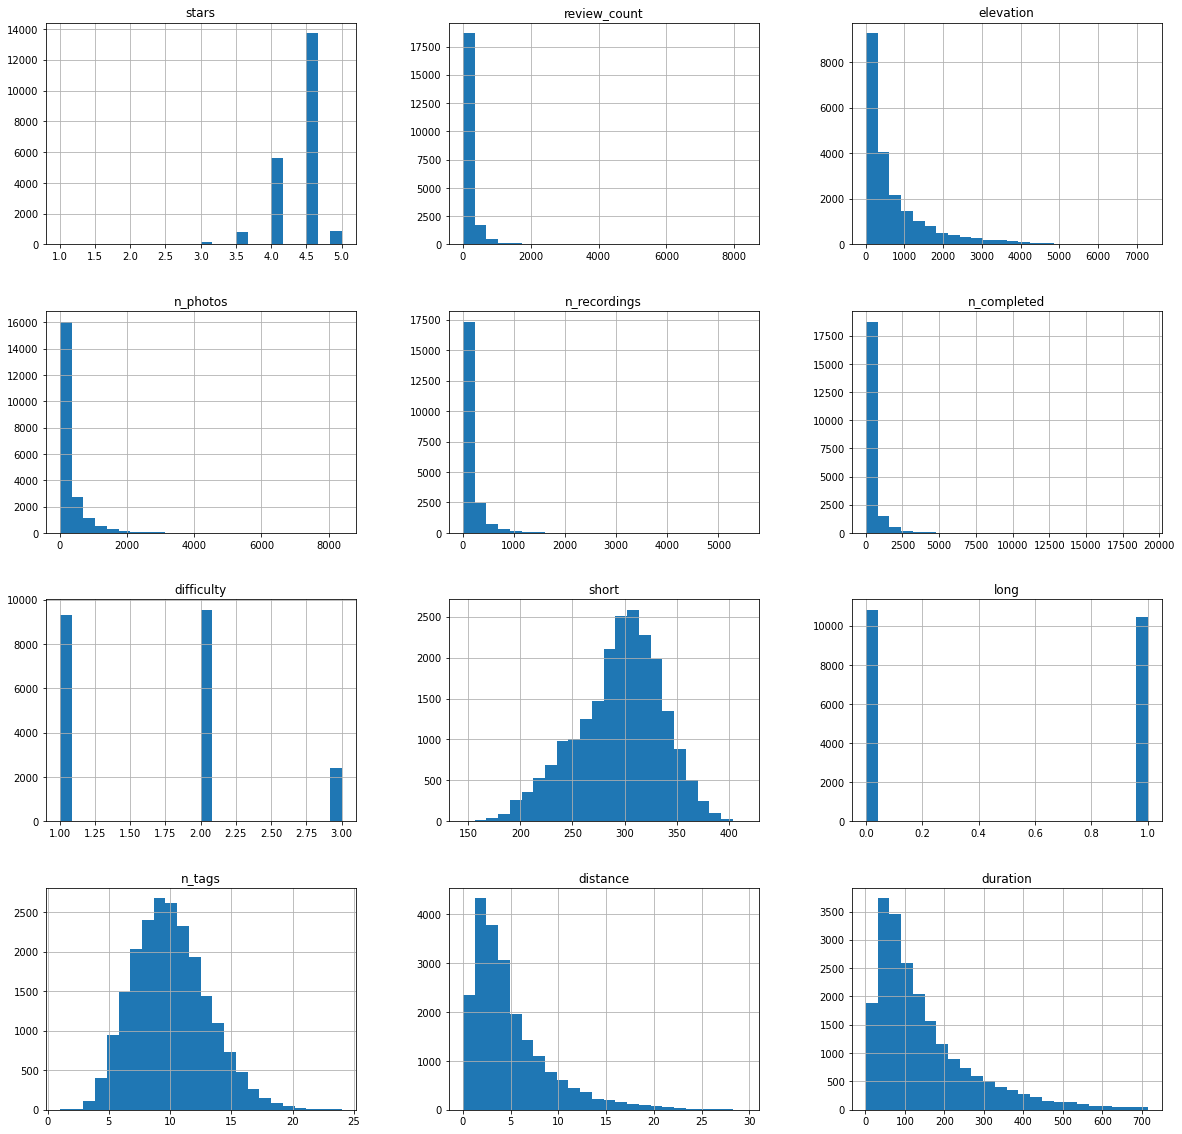

In [34]:
df.hist(bins=24, figsize=(20,20))

# Hypothesis testing

- Null: Mean star rating for trails with and without long description are the same
- Alternative: Mean star rating for trails with and without long description are not the same

In [35]:
from scipy import stats

## Long description existence 

- Null: Mean star rating for trails with and without long description are the same
- Alternative: Mean star rating for trails with and without long description are not the same

In [36]:
# Get sample data.
a = df[df['long']==1]['stars']   #Has long description
b= df[df['long']==0]['stars']    #Doesn't have long description

# Use scipy.stats.ttest_ind.
t, p = stats.ttest_ind(a, b, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 7.06415  p = 1.66592e-12


## Short description word count

- Null: Mean star rating for trails with >300 vs <= 300 words short description are the same
- Alternative: Mean star rating for trails >300 vs <=300 words short description are not the same

In [56]:
c = df[df['short']>300]['stars']
d = df[df['short']<=300]['stars']

t, p = stats.ttest_ind(c, d, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 4.34886  p = 1.37495e-05


In [52]:
c.mean()

4.338879326831134

In [54]:
c.var()

0.10457221628674197

In [53]:
d.mean()

4.3176933765632235

In [55]:
d.var()

0.1482509324695594

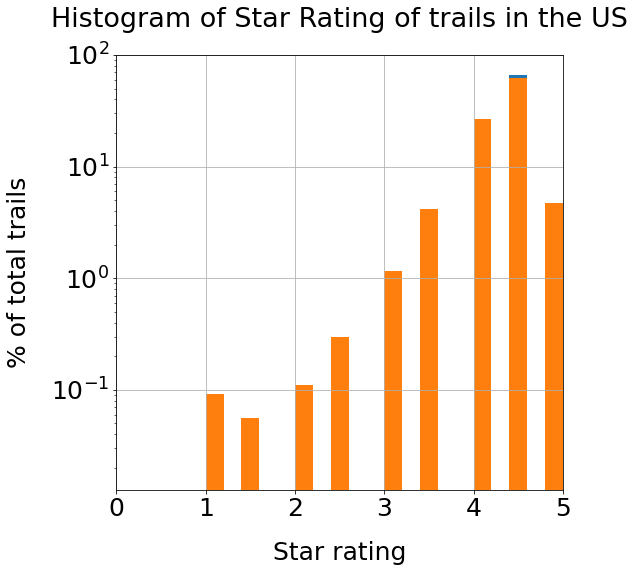

In [46]:
c = df[df['short']>300]
d = df[df['short']<=300]

fig=plt.figure()

ax=c['stars'].hist(weights = np.ones_like(c.index) / len(c.index)*100, bins=20,figsize=(8,8))
ax2 = d['stars'].hist(weights = np.ones_like(d.index) / len(d.index)*100, bins=20,figsize=(8,8))
ax.set_ylabel('% of total trails', fontsize=25)
ax.set_xlabel('Star rating', fontsize=25)
ax.set_xlim(0,5)
ax.set_yscale('log')
ax.grid('off')
ax.tick_params(labelsize=25)
ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20

plt.title('Histogram of Star Rating of trails in the US', y=1.05, fontsize=27)
plt.show()

## Difficulty level

In [38]:
e = df[df['difficulty']==1]['stars']
f = df[df['difficulty']==3]['stars']

t, p = stats.ttest_ind(e, f, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = -35.9938  p = 5.49578e-251
